In [2]:
MAP_KEY = '52dd51b587fe0f9d6bd40c412ceb4fec'

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 4, Finished, Available, Finished)

In [4]:


import pandas as pd
url = 'https://firms.modaps.eosdis.nasa.gov/mapserver/mapkey_status/?MAP_KEY=' + MAP_KEY
try:
  df = pd.read_json(url,  typ='series')
  display(df)
except:
  print ("Error en la consulta.\nIntente en el navegador: %s" % url)

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 6, Finished, Available, Finished)

transaction_limit             5000
current_transactions             0
transaction_interval    10 minutes
dtype: object

In [5]:
# funcion para averiguar cuantas transacciones hemos usado.

def get_transaction_count() :
  count = 0
  try:
    df = pd.read_json(url,  typ='series')
    count = df['current_transactions']
  except:
    print ("Error en la llamada.")
  return count

tcount = get_transaction_count()
print ('El número actual de transacciones es  %i' % tcount)

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 7, Finished, Available, Finished)

El número actual de transacciones es  0


In [3]:
# el servicio data_availability esta diseñado para informar a los usuarios la disponibilidad de los datos de la NASA.
# esta url devuelve información acerca de los sensores de los satélites y sus correspondientes datasets
# colocando 'all' se obtiene la disponibilidad de todos los sensores, o se puede especificar un sensor en particular, por ej LANDSAT_NRT
da_url = 'https://firms.modaps.eosdis.nasa.gov/api/data_availability/csv/' + MAP_KEY + '/all'
df = pd.read_csv(da_url)
display(df)

# en la columna de los satelites (data_id), 'NRT' significa "Near Real-Time",
# mientras que 'SP' "Standard Processing" significa que hay un retardo en la disponibilidad de los datos
# min_date y max_date muestran el rango disponible de estos datasets. 



StatementMeta(, 298c1e57-4ccf-4c14-9116-4c0ac2f588c5, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 0215d086-b084-4dd7-b81c-da9899530362)

In [2]:
# Lista de paises y sus coordenadas
import pandas as pd
countries_url = 'https://firms.modaps.eosdis.nasa.gov/api/countries'
df_countries = pd.read_csv(countries_url, sep=';')


StatementMeta(, 9628c905-8ca6-425a-bc68-f2edd3b9c2a2, 4, Finished, Available, Finished)

In [3]:
df_countries[['id','abreviation','name','extent']]

StatementMeta(, 9628c905-8ca6-425a-bc68-f2edd3b9c2a2, 5, Finished, Available, Finished)

,id,abreviation,name,extent
0,1,ABW,Aruba,"BOX(-70.0624080069999 12.417669989,-69.8768204..."
1,2,AFG,Afghanistan,"BOX(60.4867777910001 29.3866053260001,74.89230..."
2,3,AGO,Angola,"BOX(11.6693941430001 -18.0314047239998,24.0617..."
3,4,AIA,Anguilla,"BOX(-63.4288223949999 18.1690941430001,-62.972..."
4,6,ALA,Aland Islands,"BOX(19.5131942070001 59.9044863950001,21.09669..."
...,...,...,...,...
239,234,WSM,Samoa,"BOX(-172.782582161 -14.052829685,-171.43769283..."
240,235,YEM,Yemen,"BOX(42.5457462900001 12.1114436720001,54.54029..."
241,236,ZAF,South Africa,"BOX(16.4699813160001 -46.965752863,37.97779381..."
242,237,ZMB,Zambia,"BOX(21.9798775630001 -18.0692318719999,33.6742..."


In [4]:
df_countries.to_csv("abfss://NASA@onelake.dfs.fabric.microsoft.com/DataflowsStagingLakehouse.Lakehouse/Files/countriescoord.csv", index=False) 


StatementMeta(, 9628c905-8ca6-425a-bc68-f2edd3b9c2a2, 6, Finished, Available, Finished)

In [6]:
# Ejemplo de datos del satelite MODIS para Argentina en el ultimo dia
arg_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + '/MODIS_NRT/ARG/1'
df_arg = pd.read_csv(arg_url)
df_arg

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 8, Finished, Available, Finished)

,country_id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,ARG,-32.38187,-60.47743,303.10,2.82,1.60,2024-10-07,126,Terra,MODIS,53,6.1NRT,286.15,30.64,N
1,ARG,-24.28634,-60.43397,305.18,2.23,1.45,2024-10-07,128,Terra,MODIS,59,6.1NRT,295.09,12.77,N
2,ARG,-23.62938,-64.24226,322.54,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,296.11,24.45,N
3,ARG,-23.62779,-64.25452,326.45,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,295.86,30.55,N
4,ARG,-23.61943,-64.24075,309.72,1.27,1.12,2024-10-07,633,Aqua,MODIS,78,6.1NRT,295.63,9.24,N
5,ARG,-23.61785,-64.25301,321.99,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,296.36,24.42,N
6,ARG,-27.55103,-65.70129,319.92,1.40,1.17,2024-10-07,1401,Terra,MODIS,72,6.1NRT,291.66,21.60,D
7,ARG,-25.77855,-62.96612,316.83,2.03,1.39,2024-10-07,1401,Terra,MODIS,65,6.1NRT,296.94,20.42,D
8,ARG,-25.77649,-62.95912,316.94,2.03,1.39,2024-10-07,1401,Terra,MODIS,64,6.1NRT,297.56,20.76,D
9,ARG,-25.68143,-57.97794,335.05,4.64,1.97,2024-10-07,1401,Terra,MODIS,86,6.1NRT,294.56,284.20,D


In [7]:

!pip install geodatasets cartopy contextily

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 9, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 108.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.3 MB/s eta 0:00:00:00:0100:01


In [8]:
!pip install geopandas

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 10, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 63.1 MB/s eta 0:00:00:00:010:01


In [9]:

import contextily as cx
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 11, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 12, Finished, Available, Finished)

<Axes: >

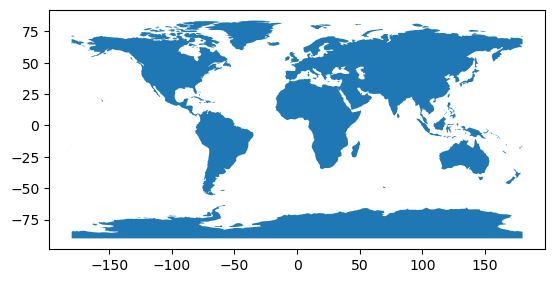

In [10]:

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

world.plot()

In [11]:
# Para convertir latitud y longitud en un punto geometrico se usa la funcion gpd.points_from_xy()
# Tambien se especifica el sistema de coordenadas o coordinate reference system (CRS). 
# El código ‘4326’ significa valores de latitud y longitud.


gdf = geopandas.GeoDataFrame(
    df_arg, geometry=geopandas.points_from_xy(df_arg.longitude, df_arg.latitude), crs="EPSG:4326"
)

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 13, Finished, Available, Finished)

In [17]:
gdf

StatementMeta(, 9628c905-8ca6-425a-bc68-f2edd3b9c2a2, 19, Finished, Available, Finished)

,country_id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,geometry
0,ARG,-32.38187,-60.47743,303.10,2.82,1.60,2024-10-07,126,Terra,MODIS,53,6.1NRT,286.15,30.64,N,POINT (-60.47743 -32.38187)
1,ARG,-24.28634,-60.43397,305.18,2.23,1.45,2024-10-07,128,Terra,MODIS,59,6.1NRT,295.09,12.77,N,POINT (-60.43397 -24.28634)
2,ARG,-23.62938,-64.24226,322.54,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,296.11,24.45,N,POINT (-64.24226 -23.62938)
3,ARG,-23.62779,-64.25452,326.45,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,295.86,30.55,N,POINT (-64.25452 -23.62779)
4,ARG,-23.61943,-64.24075,309.72,1.27,1.12,2024-10-07,633,Aqua,MODIS,78,6.1NRT,295.63,9.24,N,POINT (-64.24075 -23.61943)
5,ARG,-23.61785,-64.25301,321.99,1.27,1.12,2024-10-07,633,Aqua,MODIS,100,6.1NRT,296.36,24.42,N,POINT (-64.25301 -23.61785)
6,ARG,-27.55103,-65.70129,319.92,1.40,1.17,2024-10-07,1401,Terra,MODIS,72,6.1NRT,291.66,21.60,D,POINT (-65.70129 -27.55103)
7,ARG,-25.77855,-62.96612,316.83,2.03,1.39,2024-10-07,1401,Terra,MODIS,65,6.1NRT,296.94,20.42,D,POINT (-62.96612 -25.77855)
8,ARG,-25.77649,-62.95912,316.94,2.03,1.39,2024-10-07,1401,Terra,MODIS,64,6.1NRT,297.56,20.76,D,POINT (-62.95912 -25.77649)
9,ARG,-25.68143,-57.97794,335.05,4.64,1.97,2024-10-07,1401,Terra,MODIS,86,6.1NRT,294.56,284.20,D,POINT (-57.97794 -25.68143)


In [19]:
gdf.count()[0]

StatementMeta(, 9628c905-8ca6-425a-bc68-f2edd3b9c2a2, 21, Finished, Available, Finished)

/tmp/ipykernel_5959/3965849544.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gdf.count()[0]


22

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 14, Finished, Available, Finished)

/tmp/ipykernel_6153/23770725.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if gdf.count()[0] > 0 :


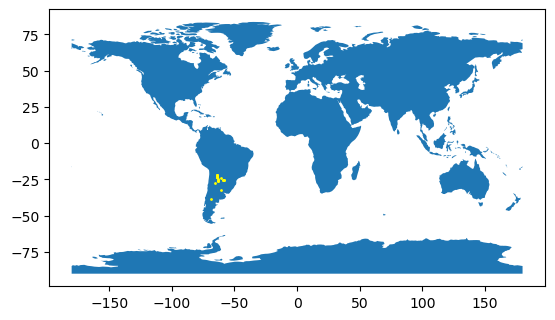

In [12]:
ax = world.plot()
if gdf.count()[0] > 0 :
  gdf.plot(ax=ax, color="yellow", markersize=1)
plt.show()

In [14]:
!pip install folium matplotlib mapclassify

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 16, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00


In [15]:
gdf.explore()

StatementMeta(, fa1317de-5be8-4ca6-8c35-311fdde0359b, 17, Finished, Available, Finished)